<a href="https://colab.research.google.com/github/jzhengzhi/KU_Natural-Language_202501/blob/main/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
!pip install selenium

In [112]:
from selenium import webdriver
from selenium.webdriver.common.by import By

URL = "https://land.naver.com/news/headline.naver"

options = webdriver.ChromeOptions()
options.add_argument(" --headless")
options.add_argument(" --disable-dev-shm-usage")
options.add_argument(" --no-sandbox")
driver = webdriver.Chrome(options=options)
driver.get(URL)
print(driver.title)

주요뉴스, 뉴스 : 내집마련의 시작, 네이버페이 부동산


In [113]:
title = driver.find_elements(By.CLASS_NAME, 'title')
for tmp in title:
    print(tmp.text)

“요즘 보기 드문 집이네”…친정·시어머니 동거 과천 청약 당첨자, 알고 보니 ‘꼼수’
심상치 않은 롯데건설…"PF는 줄었는데 돈이 안 돈다" [Why&Next]
‘얼죽신’ 때문에 이런 짓까지…가짜 결혼·가짜 이혼 판 치는 청약시장
‘영끌’ 대신 투자받아 내집 마련…지분형 모기지 나온다
‘입주하면 집값 하락’ 옛말…꺾일 줄 모르는 서울 신축 아파트
'부채비율 589%' 금호건설, '신용등급'도 없는 이유
GS건설, 4400억 투자해 '1.2조' 매각 성공할까
"한강변 랜드마크 사수"…용산·압구정·성수·여의도 수주전 개막
"재개발해도 쭉 한강뷰"…선우용여 아파트 어디길래 [집코노미-핫!부동산]
대선 한 달 앞두고…"우리 집 살까" 관심 폭발한 아파트 [주간이집]
"-400만원 마통이 24억 됐다"…가계부 쓰는 직장인, 대박 난 비결
위장전입부터 가짜결혼까지…390건 청약 부정 적발
"사돈까지 한집에서 15년?" 국토부 주택 부정청약 390건 적발
이완용 후손, `30억 돈벼락`…나라 판 돈 들고 해외 떠났다
100억대 원베일리, 샴푸도둑 때문에 공용품 지급 중단[부동산360]
‘임장크루’ 몰려들자… 공인중개사협회 ‘임장비’ 추진 논란 가열
"강남 재건축 '대어' 잡아라"…개포우성7차 격전 [현장]
"50층 넘는 아파트 안돼"…서울시가 재건축 '제동' 건 이유
“전셋값 오히려 오른다” “임대인 희생 강요” 조기 대선 시작…임대차2법 손질되나[부동산360]
이완용 증손자 북아현동 700평 땅 찾아 ‘돈벼락’…나라 판 돈 들고 해외로


In [114]:
btn_page = driver.find_element(By.CSS_SELECTOR, 'a.next')

#overlapping_element = driver.find_element(By.CSS_SELECTOR, '#contents > div.prod_detail_footer')
#driver.execute_script("arguments[0].remove()", overlapping_element)

In [115]:
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

#last_page = soup.select_one("#pagination > a.NP\\=r\\:11")
#last_page_num = int(last_page.get_text())
last_page_num = 11

In [116]:
titles_list = []

base_url = "https://land.naver.com/news/headline.naver?page="

for page in range(1, last_page_num + 1):
    driver.get(base_url + str(page))
    time.sleep(1)

    titles = driver.find_elements(By.CLASS_NAME, 'title')
    for t in titles:
        titles_list.append(t.text)

driver.quit()

In [117]:
!pip install konlpy wordcloud matplotlib > /dev/null
!apt-get -qq install fonts-nanum

In [119]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

In [123]:
full_text = ' '.join(titles_list)

# 2. 형태소 분석 (명사만 추출)
from konlpy.tag import Okt
from collections import Counter

okt = Okt()
nouns = okt.nouns(full_text)

# 3. 불용어 제거 + 한 글자 단어 제거
stopwords = set(['뉴스', '기자', '보도','위해', '시장'])
filtered = [n for n in nouns if len(n) > 1 and n not in stopwords]

# 4. 단어 빈도 계산
word_freq = Counter(filtered)

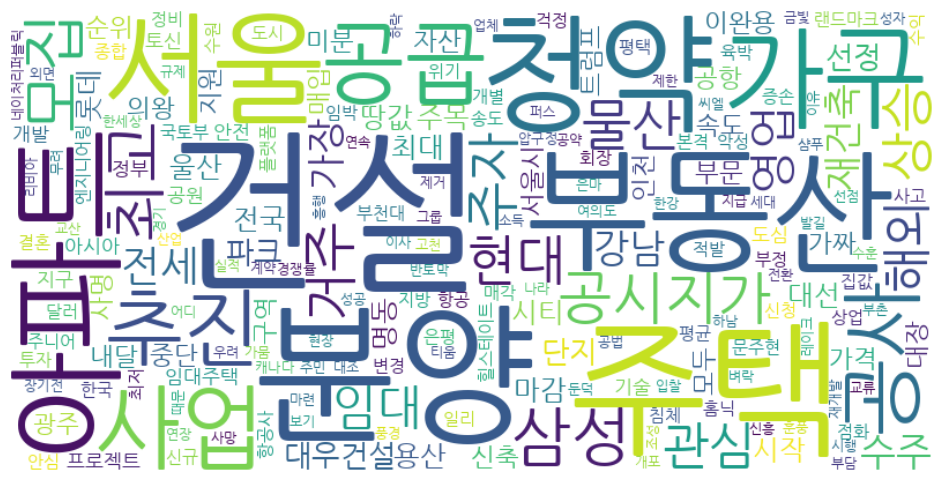

In [125]:
from wordcloud import WordCloud

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()